In [6]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np


In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 0~1 scaling 
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encoding 
y_train = keras.utils.to_categorical(y_train, num_classes= 10)
y_test = keras.utils.to_categorical(y_test, num_classes= 10)

In [28]:
model = keras.Sequential()

model.add( keras.layers.InputLayer(shape= (28,28,1) ))
model.add( keras.layers.Conv2D( 64, (3,3)) )
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add( keras.layers.Conv2D( 128, (3,3)) )
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense( 256, activation='sigmoid' ))
model.add( keras.layers.Dense( 128, activation='sigmoid' ))
model.add( tf.keras.layers.Dropout(0.2))
model.add( keras.layers.Dense( 64, activation='sigmoid' ))
model.add( tf.keras.layers.Dropout(0.2))
model.add( keras.layers.Dense( 32, activation='sigmoid' ))
model.add( tf.keras.layers.Dropout(0.2))
model.add( keras.layers.Dense( 10, activation='softmax' ))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 937,514 (3.58 MB)

 Trainable params: 937,514 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.1)

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.3246 - loss: 2.0202 - val_accuracy: 0.9633 - val_loss: 0.6329
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9386 - loss: 0.5895 - val_accuracy: 0.9808 - val_loss: 0.1833
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9709 - loss: 0.2521 - val_accuracy: 0.9845 - val_loss: 0.1015
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9805 - loss: 0.1520 - val_accuracy: 0.9847 - val_loss: 0.0801
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9837 - loss: 0.1132 - val_accuracy: 0.9860 - val_loss: 0.0777
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9866 - loss: 0.0864 - val_accuracy: 0.9858 - val_loss: 0.0678
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9887 - loss: 0.0700 - val_accuracy: 0.9853 - val_loss: 0.0615
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9913 - loss: 0.0566 - val_accu

KeyboardInterrupt: 

In [30]:
from PIL import Image

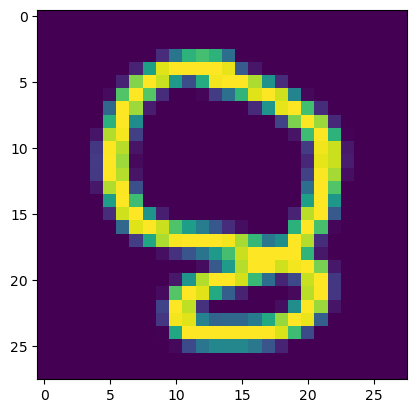

In [31]:
##  손으로 쓴 글씨 를 불러와보기 (그림판 활용)

myimg = Image.open("mynumber2.png")
myimg = np.array(myimg.resize((28, 28)))
myimg = np.mean(myimg, axis=2)
myimg = np.abs(myimg - 255.)

plt.imshow(myimg) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
model predicted as = 9


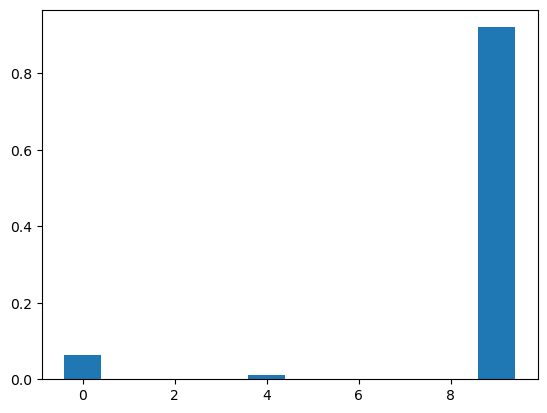

In [32]:

predicted_value = model.predict(myimg.reshape(1, 28, 28)).reshape(10)

plt.bar( x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], height = predicted_value) 
print(f"model predicted as = {np.argmax(predicted_value)}" )
